In [5]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

In [6]:
kgh = pd.read_csv('Desktop/Kodilla-moduly-od-7/kgh_d.csv', parse_dates = True)
kgh

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221
...,...,...,...,...,...,...
1366,2020-06-24,89.86,91.68,88.34,88.56,496999
1367,2020-06-25,88.22,90.08,87.94,89.86,426844
1368,2020-06-26,90.00,90.84,88.40,88.68,550372
1369,2020-06-29,88.60,90.46,88.60,90.46,371375


In [9]:
cu = pd.read_csv('Desktop/Kodilla-moduly-od-7/ca_c_f_d.csv')
cu

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5
...,...,...,...,...,...
1395,2020-07-07,6086.0,6086.0,6086.0,6086.0
1396,2020-07-08,6194.0,6194.0,6194.0,6194.0
1397,2020-07-09,6339.5,6339.5,6339.5,6339.5
1398,2020-07-10,6322.5,6322.5,6322.5,6322.5


# pierwszy sposob

## 1. Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie")

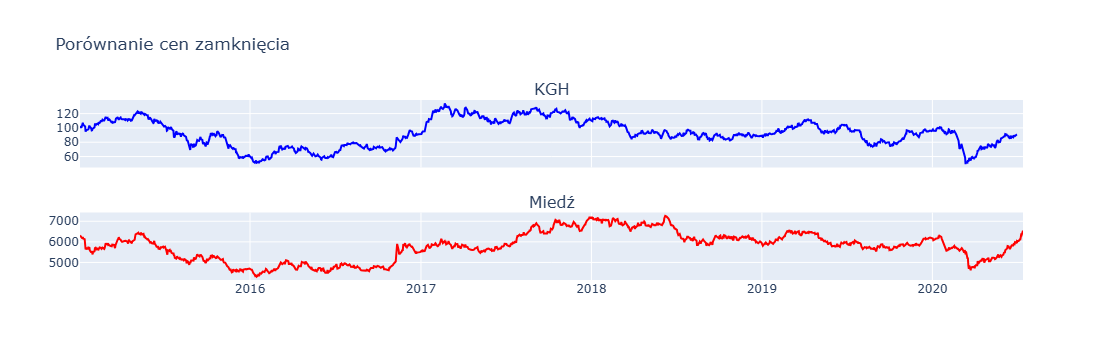

In [12]:
fig = make_subplots(rows = 2, cols = 1, subplot_titles = 
                             ['KGH', 'Miedź'], shared_xaxes = True)
fig.add_trace(go.Scatter(x = kgh['Data'], y = kgh['Zamkniecie'], mode = 'lines', line=dict(color='blue'), showlegend = False), 1,1)
fig.add_trace(go.Scatter(x = cu['Data'], y = cu['Zamkniecie'], mode = 'lines', line=dict(color='red'), showlegend = False), 2,1)
fig.update_layout(title = 'Porównanie cen zamknięcia')
iplot(fig)

## 2. Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie").

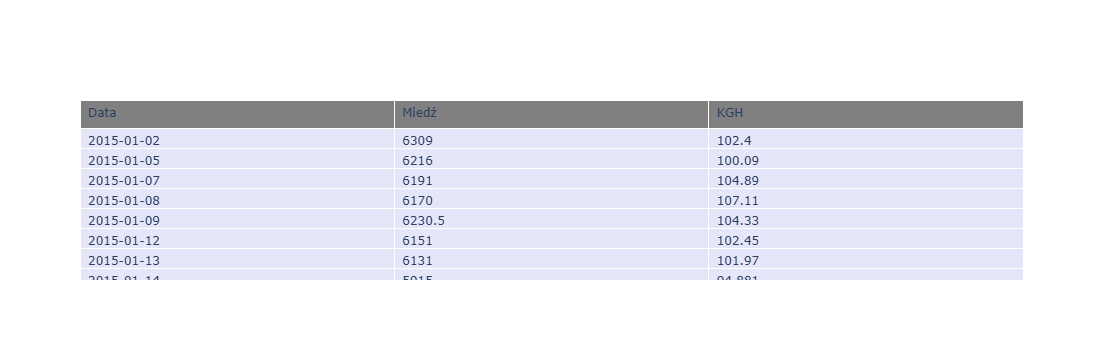

In [21]:
header = dict(values = ['Data', 'Miedź', 'KGH'],
              fill_color = 'grey',
              align = 'left')
cells = dict(values = [kgh['Data'], cu['Zamkniecie'], kgh['Zamkniecie']], 
             fill_color = 'lavender',
             align = 'left')
fig = go.Figure(data = [go.Table(header = header, cells = cells)])
fig.show()

# drugi sposob

## 1. Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie")

In [48]:
# tworzenie jednej tablicy z wartosciami dla miedzi i kgh
# usuwam elementy ktore nie maja odpowiednika daty w obu tablicach
all = pd.merge(cu[['Data', 'Zamkniecie']], kgh[['Data' , 'Zamkniecie']], left_on = 'Data', right_on = 'Data', how = 'outer')
all = all.dropna(thresh = 3, axis = 0)
all.columns = ['Data', 'Miedź', 'KGH']
all

,Data,Miedź,KGH
0,2015-01-02,6309.0,102.40
1,2015-01-05,6216.0,100.09
3,2015-01-07,6170.0,104.89
4,2015-01-08,6230.5,107.11
5,2015-01-09,6151.0,104.33
...,...,...,...
1404,2020-06-24,5871.0,88.56
1405,2020-06-25,5880.5,89.86
1406,2020-06-26,5985.5,88.68
1407,2020-06-29,5957.0,90.46


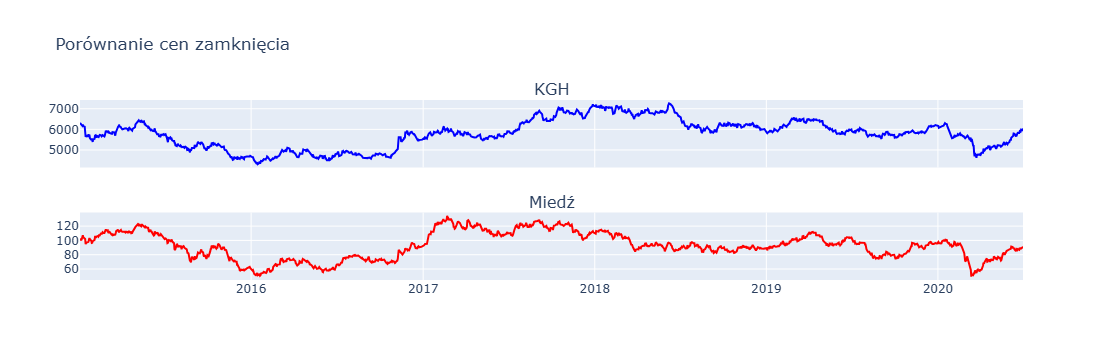

In [50]:
fig = make_subplots(rows = 2, cols = 1, subplot_titles = 
                             ['KGH', 'Miedź'], shared_xaxes = True)
fig.add_trace(go.Scatter(x = all['Data'], y = all['Miedź'], mode = 'lines', line=dict(color='blue'), showlegend = False), 1,1)
fig.add_trace(go.Scatter(x = all['Data'], y = all['KGH'], mode = 'lines', line=dict(color='red'), showlegend = False), 2,1)
fig.update_layout(title = 'Porównanie cen zamknięcia')
iplot(fig)

## 2. Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie").

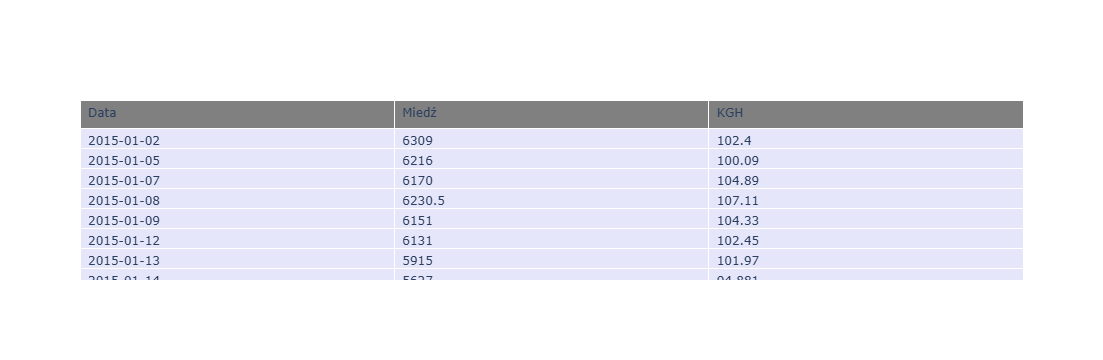

In [56]:
header = dict(values = ['Data', 'Miedź', 'KGH'],
              fill_color = 'grey',
              align = 'left')
cells = dict(values = [all['Data'], all['Miedź'], all['KGH']], 
             fill_color = 'lavender',
             align = 'left')
fig = go.Figure(data = [go.Table(header = header, cells = cells)])
fig.show()